# Assignment 1

**Assignment 1: Optimization**

**Goal**: ​Get familiar with gradient-based and derivative-free optimization by implementing these methods and applying them to a given function.

**Please add your shareable Colab link here:** https://colab.research.google.com/drive/1MmbExn38DPCXVgIv3osXwX8LZiOjreSr?usp=sharing

In this assignment we are going to learn about **gradient-based** (GD) optimization methods and **derivative-free optimization** (DFO) methods. The goal is to implement these methods (one from each group) and analyze their behavior. Importantly, we aim at noticing differences between these two groups of methods.

Here, we are interested in ​minimizing​ the following function:

$$
f(\mathbf{x})=x_{1}^{2}+2 x_{2}^{2}-0.3 \cos \left(3 \pi x_{1}\right)-0.4 \cos \left(4 \pi x_{2}\right)+0.7
$$

in the domain $\mathbf{x} = (x_1, x_2) \in [-100, 100]^{2}$ (i.e., $x_1 \in [-100, 100]$, $x_2 \in [-100, 100]$).

In this assignemnt, you are asked to implement:
1. The gradient-descent algorithm.
2. A chosen derivative-free algorithm. *You are free to choose a method.*

After implementing both methods, please run experiments and compare both methods. Please find a more detailed description below.

## 1. Understanding the objective

Please run the code below and visualize the objective function. Please try to understand the objective function, what is the optimum (you can do it by inspecting the plot).

If any code line is unclear to you, please read on that in numpy or matplotlib docs.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# PLEASE DO NOT REMOVE!
# The objective function.
def f(x):
    return (
        x[:, 0] ** 2
        + 2 * x[:, 1] ** 2
        - 0.3 * np.cos(3.0 * np.pi * x[:, 0])
        - 0.4 * np.cos(4.0 * np.pi * x[:, 1])
        + 0.7
    )

In [3]:
# PLEASE DO NOT REMOVE!
# Calculating the objective for visualization.
def calculate_f(x1, x2):
    f_x = []
    for i in range(len(x1)):
        for j in range(len(x2)):
            f_x.append(f(np.asarray([[x1[i], x2[j]]])))

    return np.asarray(f_x).reshape(len(x1), len(x2))

In [4]:
# PLEASE DO NOT REMOVE!
# Define coordinates
x1 = np.linspace(-100.0, 100.0, 400)
x2 = np.linspace(-100.0, 100.0, 400)

# Calculate the objective
f_x = calculate_f(x1, x2).reshape(len(x1), len(x2))

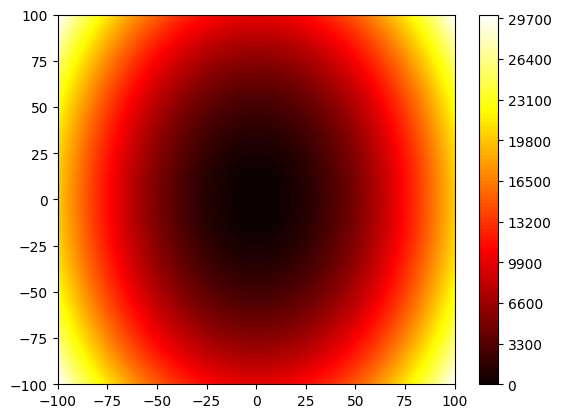

In [5]:
# PLEASE DO NOT REMOVE!
# Plot the objective
plt.contourf(x1, x2, f_x, 100, cmap="hot")
plt.colorbar()

## 2. The gradient-descent algorithm

First, you are asked to implement the gradient descent (GD) algorithm. Please take a look at the class below and fill in the missing parts.

NOTE: Please pay attention to the inputs and outputs of each function.

NOTE: To implement the GD algorithm, we need a gradient with respect to $\mathbf{x}$ of the given function. Please calculate it on a paper and provide the solution below. Then, implement it in an appropriate function that will be further passed to the GD class.

**Question 1 (0-1pt):** What is the gradient of the function $f(\mathbf{x})$? Please fill below both the mathematical expression and within the code.

**Answer:**
\begin{align*}
\nabla_{\mathbf{x}_1} f(\mathbf{x}) & = 2\mathbf{x}_1 + 0.9π\sin(3\pi\mathbf{x}_1)  \\
\nabla_{\mathbf{x}_2} f(\mathbf{x}) &= 4\mathbf{x}_2 + 1.6\pi\sin(4\pi\mathbf{x}_2)  \\
\end{align*}

In [6]:
# =========
# GRADING:
# 0
# 0.5pt - if properly implemented and commented well
# =========
# Implement the gradient for the considered f(x).
def grad(x):
    """
    Computes the gradient for the function:f(x) = x1^2 + 2x2^2 - 0.3*cos(3πx1) - 0.4*cos(4πx2) + 0.7

    Args:

    x (array): a 2D vector [x1, x2]

    Returns:
    grad (array): the gradient of the function at x
    """
    x1, x2 = x[0]

    # compute partial derivatives:
    df_dx1 = 2 * x1 + 0.9 * np.pi * np.cos(3 * np.pi * x1)
    df_dx2 = 4 * x2 + 1.6 * np.pi * np.cos(4 * np.pi * x2)

    # print(x) # for analysis only
    grad = np.array([df_dx1, df_dx2])      # 0.7 pt
    # ------
    return grad

In [7]:
# =========
# GRADING:
# 0
# 0.5pt if properly implemented and commented well
# =========
# Implement the gradient descent (GD) optimization algorithm.
# It is equivalent to implementing the step function.
class GradientDescent(object):
    def __init__(self, grad, step_size=0.1):
        self.grad = grad
        self.step_size = step_size

    def step(self, x_old):
        """
        Performs a single step of the gradient descent algorithm.

        Args:
        x_old (array): a 2D vector [x1, x2]

        Returns:
        x_new (array): a 2D vector [x1, x2]

        """
        # compute the gradient at the current point
        grad_x = self.grad(x_old)

        # take the step in the direction opposite to the gradient
        x_new = x_old - self.step_size * grad_x
        # ------
        return x_new

In [8]:
# PLEASE DO NOT REMOVE!
# An auxiliary function for plotting.
def plot_optimization_process(ax, optimizer, title):
    # Plot the objective function
    ax.contourf(x1, x2, f_x, 100, cmap="hot")

    # Init the solution
    x = np.asarray([[90.0, -90.0]])
    x_opt = x
    # Run the optimization algorithm
    for i in range(num_epochs):
        x = optimizer.step(x)
        x_opt = np.concatenate((x_opt, x), 0)

    ax.plot(x_opt[:, 0], x_opt[:, 1], linewidth=3.0)
    ax.set_title(title)

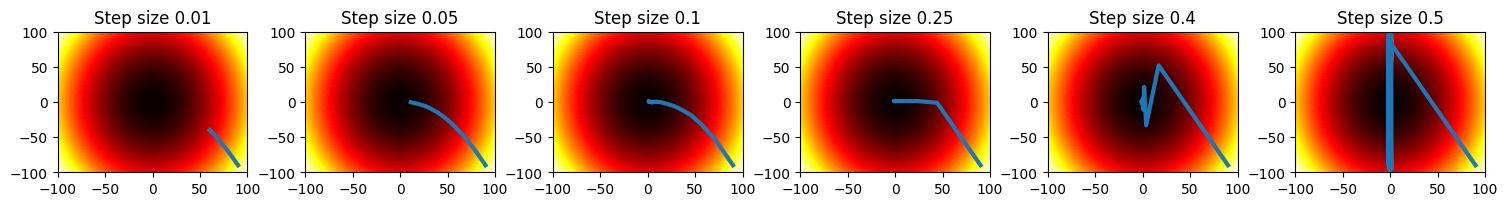

In [9]:
# PLEASE DO NOT REMOVE!
# This piece of code serves for the analysis.
# Running the GD algorithm with different step sizes
num_epochs = 20  # the number of epochs
step_sizes = [0.01, 0.05, 0.1, 0.25, 0.4, 0.5]  # the step sizes

# plotting the convergence of the GD
fig_gd, axs = plt.subplots(1, len(step_sizes), figsize=(15, 2))
fig_gd.tight_layout()

for i in range(len(step_sizes)):
    # take the step size
    step_size = step_sizes[i]
    # init the GD
    gd = GradientDescent(grad, step_size=step_size)
    # plot the convergence
    plot_optimization_process(
        axs[i], optimizer=gd, title="Step size " + str(gd.step_size)
    )

**Question 2 (0-0.5pt)**: Please analyze the plots above and comment on the behavior of the gradient-descent for different values of the step size. What happens in the small and large step sizes and what is the optimum step size?

**Answer**: The plot shows how the gd algorithm function across a range of step-sizes. I will comment on the behaviour of the algorithm in each instance and will infer whether a distinction can be made.
- Step size 0.01: The lowest step size, here you can see that the algorithm does not reach the optimum in the center, this is likely due to the fact that the step size is too small for the algorithm to reach the mimimum in time, this could be subverted by either increasing the step size, or alternatively increasing the number of epochs, since the algorithm appears to be heading towards the optimum.

- Step size 0.05, 0.1, 0.25: in these iterations the step size is increased by a factor of 5, 10 and 25 respectively, in all instances the algorithm appears to reach the optimum at a relatively efficient rate. However at step size 0.25 we can see a kink in the graph indeicating that the change in direction was likely made in fewer, or even a single step compared to the 0.05 and 0.1 graphs which deplay a smoother transition from step to step.

- Step size 0.4: Increasing the intitial stepsize by a factor of 40 the algorithm overshoots its initial step when moving towards the optimum, however the step size is still small anough to afford the algorithm the opportunity to correct itself, and it appears that it ultimately finds the optimum.

- Step size 0.5: The largest step size in the series, here we can see that the updates are too aggresive/greedy such that it gets trapped in the periphery of the optimum without converging. It keeps overshooting the optimum due to the large steps in the search-space.


**Question 3 (0-0.5pt)**: How can we improve the convergence when the step size equals 0.01? What about when the step size equals 0.5?

**Answer**:

- In the first case, we could increase the number of epochs to allow the model gradually approach the optimum, however low step size could prove to be at risk of overfitting and/or unnecessary computation

- In the second case, the ideal solution would likely be to just reduce the step-size, as the step size is too large and causes overshooting. Alternatively one could apply certain techniques to prevent large steps and enable more controlled convergence.

## 3. The derivative-free optimization

In the second part of this assignment, you are asked to implement a derivative-free optimziation (DFO) algorithm. Please notice that you are free to choose any DFO method you wish.
Moreover, you are encouraged to be as imaginative as possible! Do you have an idea for a new method or combine multiple methods? Great!

**Question 4 (0-0.5-1-1.5-2-2.5-3pt)**: Please provide a description (a pseudocode) of your DFO method here.

*NOTE (grading): Please keep in mind: start simple, make sure your approach works. You are encouraged to use your creativity and develop more complex approaches that will influence the grading. TAs will also check whether the pseudocode is correct.*

**Answer:**
I chose to implement the Nelder-Mead Algortihm based on the shape and characteristics of the model space. Below I have defined the pseudocode for the algorithm based on the information provided in these articles: http://www.scholarpedia.org/article/Nelder-Mead_algorithm  and
 https://en.wikipedia.org/wiki/Nelder%E2%80%93Mead_method

We aim to minimize function $f(x)$ where $x \ \epsilon\  R^n$. To do so, we evaluate the function at a set of n + 1 test points $x_1,...,x_n$$_+$$_1$. These points form the vertices of geometric shape known as a Simplex.

*Input:*

1. **Order** according to the vals at the vertices. \\
      $f(x1) \le f(x2) \le \ ...\  \le f(x_n$$_+$$_1$)$
      Check if method should terminate
2. **Calculate** $x_o$, the centroid of all points except $x_n$$_+$$_1$
3. **Reflection**
    
  **Compute** reflected point $x_r = x_o + α(x_o - x_n$$_+$$_1$) with $\alpha > 0$
  
      `If` the reflected point is better than the second worst, but not better than the best, i.e. $f(x_1) \le f(x_r) < f(x_n)$ then replace the worst point $x_n$$_+$$_1$ with $x_r$ and go back to step 1.

4. **Expansion**
    
      `elif` the reflected point is the best point so far, $f(x_r) < f(x_1)$
      
      `then` compute the expanded point $x_e = x_o + \gamma(x_r - x_o)$, with $\gamma > 1$ `and`
      replace the worst point $x_n$$_+$$_1$ with expanded point $x_e$ and go back to step 1.
5. **Contraction**
      
      `If` it is certain that $f(x_r) \ge f(x_n)$ so reflection is worse than the second worst point but still better than the worst point such that $f(x_r) < x_n$$_+$$_1$.
      
      `then` compute the point on the outside $x_c = x_o + \rho(x_r - x_o)$ with $0 < \rho \le 0.5$'

      `If` contracted point is better than the reflected point $f(x_c) < f(x_r)$ then replace worst point $x_n$$_+$$_1$ with the contracted point x_c
      `else` go to step 6

6. **Shrink**
      Replace all points except the best $(x_1)$ with, $x_i = x_1 + \sigma(x_i - x_1)$ and go to step 1.

In this algorithm $\alpha, \gamma, \rho$ and $\sigma$ represent the reflection, expansion, contraction and shrink coefficients which are as a standard set to $\alpha = 1$, $\gamma = 2$, $\rho = \frac 12$ and $\sigma = \frac 12$





In [12]:
# =========
# GRADING: 0-0.5-1-1.5-2pt
# 0
# 0.5pt the code works but it is very messy and unclear
# 1.0pt the code works but it is messy and badly commented
# 1.5pt the code works but it is hard to follow in some places
# 2.0pt the code works and it is fully understandable
# =========
# Implement a derivative-free optimization (DFO) algorithm.
# REMARK: during the init, you are supposed to pass the obj_fun and other objects that are necessary in your method.
class DFO(object):
    def __init__(self, obj_fun, simplex, alpha, gamma, rho, sigma):
        self.obj_fun = obj_fun
        # PLEASE FILL IN: You will need some other variables
        self.simplex = simplex
        self.alpha = alpha
        self.gamma = gamma
        self.rho = rho
        self.sigma = sigma
        self.centroids = [] #Tracks centroids

    ## PLEASE FILL IN IF NECESSARY
    ## Please remember that for the DFO you may need extra functions.
    def shrink(self):
        """

        performs the shrink operation on the simplex.

        """
        best = self.simplex[0]
        for i in range(1, len(self.simplex)):
          self.simplex[i] = best + self.sigma * (self.simplex[i] - best)
        return self.simplex.copy()

    # This function MUST be implemented.
    # No additional arguments here!
    def step(self, x_old):
        """
        Perform a single step of the DFO algorithm.

        Args:
        old_x (array): the initial_simplex's centroid that gets passed through the init_function.

        Returns:
        new_x (array): a 2D vector [x1, x2] containing the new centroid. that defines the next point in the simplex.

        """
        # Order the simplex points by function value
        self.simplex = self.simplex[np.argsort(self.obj_fun(self.simplex))]
        best, second_best, worst = self.simplex[0], self.simplex[1], self.simplex[2]
        # print(self.simplex)



        # Compute centroid by taking mean of x_1 up to n (excluding n + 1)
        centroid = np.mean(self.simplex[:-1], axis = 0)
        # print(centroid)



        self.centroids.append(centroid.copy())

        # Reflection
        xr = centroid + self.alpha * (centroid - worst)
        fr = self.obj_fun(xr.reshape(1, -1))

        if self.obj_fun(best.reshape(1, -1)) <= fr < self.obj_fun(second_best.reshape(1, -1)):
            self.simplex[-1] = xr

        # Expansion
        elif fr < self.obj_fun(best.reshape(1, -1)):
            xe = centroid + self.gamma * (xr - centroid)
            if self.obj_fun(xe.reshape(1, -1)) < self.obj_fun(second_best.reshape(1, -1)):
              self.simplex[-1] = xe
            else:
              self.simplex[-1] = xr

        # Contraction
        elif self.obj_fun(second_best.reshape(1, -1)) <= fr < self.obj_fun(worst.reshape(1, -1)):
          xc = centroid + self.rho * (xr - centroid)
          if self.obj_fun(xc.reshape(1, -1)) < self.obj_fun(second_best.reshape(1, -1)):
            self.simplex[-1] = xc
          else: self.shrink()

        # Shrink
        else: self.shrink()

        # Recompute centroid after update
        new_x = np.mean(self.simplex[:-1], axis = 0)

        # Track centroid
        self.centroids.append(new_x.copy())

        # Return values for graphing
        return  new_x.reshape(1, -1)





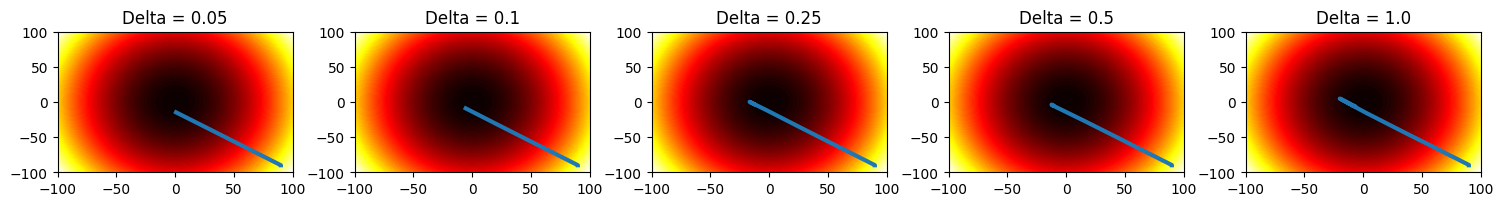

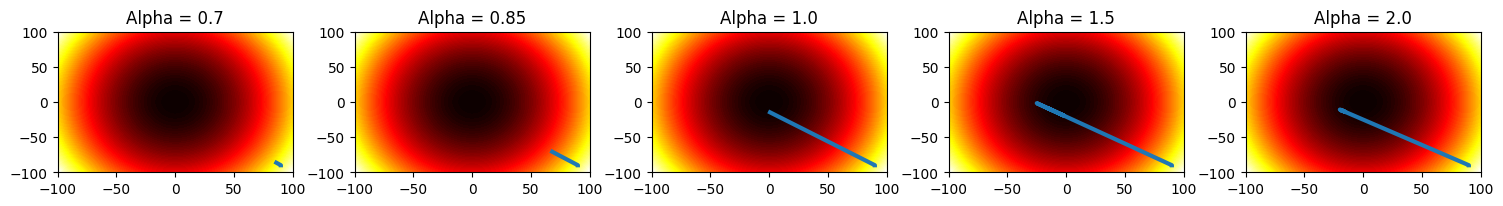

In [39]:
# PLEASE DO NOT REMOVE!
# Running the DFO algorithm with different step sizes
num_epochs = 15  # the number of epochs (you may change it!)


## PLEASE FILL IN
## Here all hyperparameters go.
## Please analyze at least one hyperparameter in a similar manner to the
## step size in the GD algorithm.
x0 = np.array([90.0, -90.0]) #starting_point

# Different delta values to analyze
deltas = [0.05, 0.1, 0.25, 0.5, 1.0] # differently sized offset, controlling the size of the initial simplex.
delta_1 = 0.05
alphas = [0.7, 0.85, 1.0, 1.5, 2.0] # influences the distance which the reflection travel when expanding, contracting and shrinking relative to the worst point in the simplex.
alpha_1 = 1
gamma = 2
rho = 0.5
sigma = 0.5

## plotting the convergence of the DFO
# Delta parameter
fig_dfo, axs = plt.subplots(1, len(deltas), figsize=(15, 2)) # number of axes = len(deltas)
fig_dfo.tight_layout()

for i in range(len(deltas)): # iterate over the delta values
  delta = deltas[i]
  initial_simplex = np.array([
      x0,
      x0 + np.array([delta, 0.0]), # perturbation along x_axis e.g. [99.5, 99.0]
      x0 + np.array([0.0, delta]), # perturbation along y_axis e.g. [99.0, 99.5]
  ])

  dfo = DFO(f, initial_simplex, alpha_1, gamma, rho, sigma)

  #   plot the convergence

  plot_optimization_process(axs[i], optimizer=dfo, title=f"Delta = {delta}")


# alpha parameter
fig_dfo, axs = plt.subplots(1, len(alphas), figsize=(15, 2)) # number of axes = len(alphas)
fig_dfo.tight_layout()

initial_simplex = np.array([
      x0,
      x0 + np.array([delta_1, 0.0]), # perturbation along x_axis e.g. [99.5, 99.0]
      x0 + np.array([0.0, delta_1]), # perturbation along y_axis e.g. [99.0, 99.5]
  ])

for i in range(len(alphas)): # iterate over the alpha values
  alpha = alphas[i]
  dfo = DFO(f, initial_simplex, alpha, gamma, rho, sigma)

  #   plot the convergence


  plot_optimization_process(axs[i], optimizer=dfo, title=f"Alpha = {alpha}")
  # print(dfo.centroids)

**Question 5 (0-0.5-1pt)** Please comment on the behavior of your DFO algorithm. What are the strong points? What are the (potential) weak points? During working on the algorithm, what kind of problems did you encounter?

**Answer:**

*What are the strong points?*

- This Algorithm appears to work well in a smooth modelspaces. With a single global optimum it heads in a straight line towards the center and this behaviour is to be expected from the heuristic outlined by the algorithm. It methodically adjusts the simplex towards the optimum by reflecting, expanding, contracting and ahrinking as it converges. This ensures that the space is efficiently searched without the need for a gradient. It is therefore particularly suitable for model-spaces that are smooth but not necesarily differentiable.

*What are the (potential) weak points?*
- If the model_space has more variation it could potentially get stuck in local minima with relative ease, due to the fact that as the simplex moves along the search space whilst applying the heuristcs it will invariably get smaller over time. This shrinking of the Simplex reduces the potential for exploration over time as the algorithm converges. Making one of its strengths also a potential weakness as it may be easily trapped by any local minima on its way towards the global optimum if the simplex becomes too small.

*During working on the algorithm, what kind of problems did you encounter?*
- I had many issues with the management of the shapes of the ingoing and outgoing arrays, this was in part because I had not familliarized myself enough with the way arrays are handled in numpy and the fact that I did not write the auxillary function for plotting. I was confused because I was unsure why I was outputting a 1D array with my step function and had to think of a way to alter the shape so that the values could be properly read into the plot function. This discrepancy in dimensions led to errors when trying to pass the data to the auxiliary plotting function.

## 4. Final remarks: GD vs. DFO

Eventually, please answer the following last question that will allow you to conclude the assignment draw conclusions.

**Question 6 (0-0.5pt)**: What are differences between the two approaches?

**Answer**:

The most obvious difference would be the dependency on gradients, the GD algorithm relying on the differentiability of the objective function. If not differentiable, or the objective dunction is unknown or very difficult/expensive to compute we cannot apply GD.

DFO instead relies on heuristics to scour the search space and uses strategic methods making it suitable for functions that are non-differentiable or noisy. It can be applied to a wider range of problems by circumventing the need for calulating the derivative.

Generally speaking, when the derivative is availlable and easy to compute the GD algorithm is less computationally expensive, in lower dimensional problems. But can quickly become slow to converge in high-dimensional spaces.

The DFO can be computationally expensive even in lower dimensional spaces, due to the need for the evaluation of the objective function at multliple points like in the Nelder-Mead algorithm, and even more so in higher dimensional spaces.

GD is ideal for problems where the objective function is smooth, continuous and differntiable, with the gradients readily availlable. It can be very useful in such particular cases but is unusable if these conditions are not met.

DFO is more robust and versatile as it can operate in noisy, discontinous spaces that are non-differntiable, however it may require more evaluations and might be slower than GD methods in smooth, well-behaved functions.

**Question 7 (0-0.5)**: Which of the is easier to apply? Why? In what situations? Which of them is easier to implement in general?

**Answer**:

I chose an Intermediate algorithm to implement as DFO and was met with several surprises along the way, however information was readily availlable and I managed to produce a wworking example of the Nelder-Mead algorithm. I found the DFO much harder to implement than the GD algorithm in this case but I would not confidently state that this is always the case. The difficulty of implementation and the choice of algorithm is really dependent on the model space, and the objective function. In this case, the objective function is known, the gradients are easy to compute and the model-space is simple and can be easily visualised as it is in 2D space. Generally in such cases a GD algorithm would be easier to implement. If the circumstances of the problem were different however, like for example in a higer dimensional space, which is more difficult to visualize. I could be convinced a DFO might be better suited and easier to implement.